# **Esercizio 1: ML**

In [3]:
import pandas as pd

## **Caricamento del dataset**:

Importa il dataset Iris utilizzando from sklearn.datasets import load_iris.
Esplora brevemente i dati per capire le caratteristiche e le target.

In [1]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data 
y = data.target

Trasformazione del dataset in dataframe per analizzare i dati.

In [5]:
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

Le dimensioni del dataframe sono 150x5, dunque il dataset ha 150 istanze e 5 attributi (di cui uno è il target).

In [9]:
df.shape

(150, 5)

Stampa delle prime 5 righe.

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Le classi sono tre *0*,*1*,*2*, per ogni classe abbiamo 50 istanze, quindi il dataset risulta essere bilanciato.

In [7]:
df.target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

Dalle informazioni si deduce che non ci sono elementi nulli.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


## **Preprocessing dei dati**:
Dividi i dati in set di addestramento e di test utilizzando train_test_split di scikit-learn (ad esempio, 70% training e 30% test).

Scaliamo i dati in modo che siano pronti per essere studiati.

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Divisione del dataset

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

## **Costruzione del modello:**
Scegli un algoritmo di classificazione (ad esempio, K-Nearest Neighbors, Decision Tree, Support Vector Machine).
Addestra il modello utilizzando il set di training.

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [25]:
classificatori={0:"K-Nearest Neighbors", 1:"Decision Tree"}

In [19]:
model={0:KNeighborsClassifier(), 1:DecisionTreeClassifier()}
y_pred = {}

In [21]:
for i in [0,1]:
    model[i].fit(X_train, y_train)
    y_pred[i] = model[i].predict(X_test)

## **Valutazione del modello**:
Predici le specie nel set di test.
Valuta le prestazioni del modello utilizzando metriche come accuratezza, precisione, richiamo e la matrice di confusione.

In [23]:
metrics={}

In [26]:
from sklearn.metrics import classification_report
for i in [0,1]:
    metrics[i] = classification_report(y_test, y_pred[i])
    print(f"Classification Report {classificatori[i]} \n {metrics[i]}")

Classification Report K-Nearest Neighbors 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.82      0.82      0.82        11
           2       0.87      0.87      0.87        15

    accuracy                           0.91        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.91      0.91      0.91        45

Classification Report Decision Tree 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.88      0.64      0.74        11
           2       0.78      0.93      0.85        15

    accuracy                           0.89        45
   macro avg       0.88      0.86      0.86        45
weighted avg       0.90      0.89      0.89        45



Il K-Nearest Neighbors è un migliore classificatore in quanto ha migliori risultati per la classe 1 e 2.

## **Visualizzazione dei risultati**:
In fine crea grafici per visualizzare i risultati (ad esempio, plot della matrice di confusione).

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

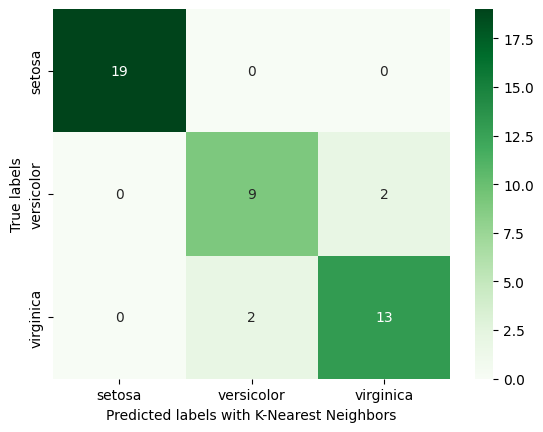

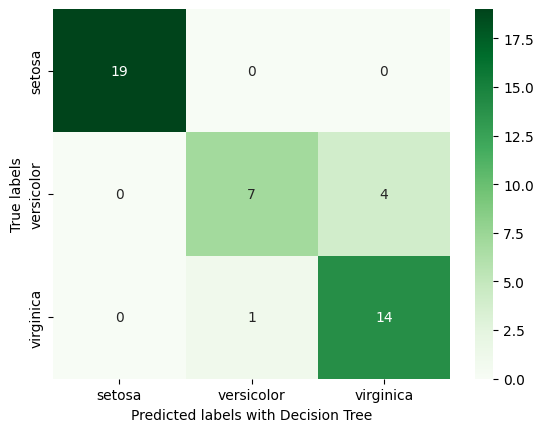

In [29]:
for i in [0,1]:
    cm = confusion_matrix(y_test, y_pred[i])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=data.target_names, yticklabels=data.target_names)
    plt.xlabel(f'Predicted labels with {classificatori[i]}')
    plt.ylabel('True labels')
    plt.show()